In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
from IPython.display import Image
import shutil
import os
from random import choice

In [3]:
!unzip "/content/drive/MyDrive/plant/pepper/leaf200.v1i.yolov5pytorch.zip" -d "/content/drive/MyDrive/plant/pepper/yolov5"

Archive:  /content/drive/MyDrive/plant/pepper/leaf200.v1i.yolov5pytorch.zip
 extracting: /content/drive/MyDrive/plant/pepper/yolov5/README.dataset.txt  
 extracting: /content/drive/MyDrive/plant/pepper/yolov5/README.roboflow.txt  
 extracting: /content/drive/MyDrive/plant/pepper/yolov5/data.yaml  
   creating: /content/drive/MyDrive/plant/pepper/yolov5/test/
   creating: /content/drive/MyDrive/plant/pepper/yolov5/test/images/
 extracting: /content/drive/MyDrive/plant/pepper/yolov5/test/images/Bacterial_spot-18-_JPG.rf.b3ffd6810ea474a8c7aa3124dcdfb065.jpg  
 extracting: /content/drive/MyDrive/plant/pepper/yolov5/test/images/Bacterial_spot-23-_JPG.rf.1684479b5540149dac69fef56e376a99.jpg  
 extracting: /content/drive/MyDrive/plant/pepper/yolov5/test/images/Bacterial_spot-25-_JPG.rf.474cda3261160cbf58703640b4e1d7dc.jpg  
 extracting: /content/drive/MyDrive/plant/pepper/yolov5/test/images/Bacterial_spot-27-_JPG.rf.61fdd0580b590faaf4680a015265fab8.jpg  
 extracting: /content/drive/MyDrive/pl

In [4]:
!unzip "/content/drive/MyDrive/plant/pepper/leaf200.v1i.mt-yolov6.zip" -d "/content/drive/MyDrive/plant/pepper/yolov6"

Archive:  /content/drive/MyDrive/plant/pepper/leaf200.v1i.mt-yolov6.zip
 extracting: /content/drive/MyDrive/plant/pepper/yolov6/README.dataset.txt  
 extracting: /content/drive/MyDrive/plant/pepper/yolov6/README.roboflow.txt  
 extracting: /content/drive/MyDrive/plant/pepper/yolov6/data.yaml  
   creating: /content/drive/MyDrive/plant/pepper/yolov6/images/
   creating: /content/drive/MyDrive/plant/pepper/yolov6/images/test/
 extracting: /content/drive/MyDrive/plant/pepper/yolov6/images/test/Bacterial_spot-18-_JPG.rf.b3ffd6810ea474a8c7aa3124dcdfb065.jpg  
 extracting: /content/drive/MyDrive/plant/pepper/yolov6/images/test/Bacterial_spot-23-_JPG.rf.1684479b5540149dac69fef56e376a99.jpg  
 extracting: /content/drive/MyDrive/plant/pepper/yolov6/images/test/Bacterial_spot-25-_JPG.rf.474cda3261160cbf58703640b4e1d7dc.jpg  
 extracting: /content/drive/MyDrive/plant/pepper/yolov6/images/test/Bacterial_spot-27-_JPG.rf.61fdd0580b590faaf4680a015265fab8.jpg  
 extracting: /content/drive/MyDrive/plan

In [5]:
!unzip "/content/drive/MyDrive/plant/pepper/leaf200.v1i.yolov7pytorch.zip" -d "/content/drive/MyDrive/plant/pepper/yolov7"

Archive:  /content/drive/MyDrive/plant/pepper/leaf200.v1i.yolov7pytorch.zip
 extracting: /content/drive/MyDrive/plant/pepper/yolov7/README.dataset.txt  
 extracting: /content/drive/MyDrive/plant/pepper/yolov7/README.roboflow.txt  
 extracting: /content/drive/MyDrive/plant/pepper/yolov7/data.yaml  
   creating: /content/drive/MyDrive/plant/pepper/yolov7/test/
   creating: /content/drive/MyDrive/plant/pepper/yolov7/test/images/
 extracting: /content/drive/MyDrive/plant/pepper/yolov7/test/images/Bacterial_spot-18-_JPG.rf.b3ffd6810ea474a8c7aa3124dcdfb065.jpg  
 extracting: /content/drive/MyDrive/plant/pepper/yolov7/test/images/Bacterial_spot-23-_JPG.rf.1684479b5540149dac69fef56e376a99.jpg  
 extracting: /content/drive/MyDrive/plant/pepper/yolov7/test/images/Bacterial_spot-25-_JPG.rf.474cda3261160cbf58703640b4e1d7dc.jpg  
 extracting: /content/drive/MyDrive/plant/pepper/yolov7/test/images/Bacterial_spot-27-_JPG.rf.61fdd0580b590faaf4680a015265fab8.jpg  
 extracting: /content/drive/MyDrive/pl

# **YoloV5**

In [6]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16408, done.
remote: Total 16408 (delta 0), reused 0 (delta 0), pack-reused 16408
Receiving objects: 100% (16408/16408), 14.89 MiB | 18.69 MiB/s, done.
Resolving deltas: 100% (11265/11265), done.


In [7]:
%cd /content/yolov5/

/content/yolov5


In [8]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.3/709.3 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.4 MB/s eta 0:00:00


In [11]:
with open(r'/content/drive/MyDrive/plant/pepper/yolov7/data.yaml', 'r') as file:
    lines = file.readlines()
    print(lines)

['train: /content/drive/MyDrive/plant/pepper/yolov7/train/images\n', 'val: /content/drive/MyDrive/plant/pepper/yolov7/valid/images\n', '\n', '\n', 'nc: 4\n', "names: ['Bacterial_spot', 'Healthy', 'Yellow_virus', 'leaf_blight']\n", '\n', 'roboflow:\n', '  workspace: dataset-aq7x0\n', '  project: leaf200\n', '  version: 1\n', '  license: CC BY 4.0\n', '  url: https://universe.roboflow.com/dataset-aq7x0/leaf200/dataset/1']


In [15]:
!wandb disabled
!python train.py --img 415 --epochs 50 --data /content/drive/MyDrive/plant/pepper/yolov5/data.yaml --weights yolov5x6.pt --cache --workers 2

/bin/bash: line 1: wandb: command not found
2024-02-03 08:00:29.539656: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-03 08:00:29.539705: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-03 08:00:29.541030: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5x6.pt, cfg=, data=/content/drive/MyDrive/plant/pepper/yolov5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucke

In [1]:
p = 78.3
r = 87.1
mAP50 = 84.3

In [16]:
!zip -r /content/drive/MyDrive/plant/file_pepper.zip /content/yolov5

updating: content/yolov5/ (stored 0%)
updating: content/yolov5/.gitattributes (deflated 4%)
updating: content/yolov5/CONTRIBUTING.md (deflated 57%)
updating: content/yolov5/data/ (stored 0%)
updating: content/yolov5/data/ImageNet100.yaml (deflated 48%)
updating: content/yolov5/data/coco128-seg.yaml (deflated 47%)
updating: content/yolov5/data/coco.yaml (deflated 49%)
updating: content/yolov5/data/SKU-110K.yaml (deflated 52%)
updating: content/yolov5/data/coco128.yaml (deflated 47%)
updating: content/yolov5/data/ImageNet.yaml (deflated 54%)
updating: content/yolov5/data/VisDrone.yaml (deflated 58%)
updating: content/yolov5/data/Objects365.yaml (deflated 53%)
updating: content/yolov5/data/Argoverse.yaml (deflated 55%)
updating: content/yolov5/data/ImageNet10.yaml (deflated 42%)
updating: content/yolov5/data/hyps/ (stored 0%)
updating: content/yolov5/data/hyps/hyp.scratch-high.yaml (deflated 53%)
updating: content/yolov5/data/hyps/hyp.scratch-med.yaml (deflated 53%)
updating: content/yolo

**YoloV6**

In [17]:
%cd ..

/content


In [18]:
!git clone https://github.com/meituan/YOLOv6.git

Cloning into 'YOLOv6'...
remote: Enumerating objects: 3834, done.
remote: Counting objects: 100% (1707/1707), done.
remote: Compressing objects: 100% (327/327), done.
remote: Total 3834 (delta 1499), reused 1394 (delta 1380), pack-reused 2127
Receiving objects: 100% (3834/3834), 47.12 MiB | 33.02 MiB/s, done.
Resolving deltas: 100% (2337/2337), done.


In [19]:
%cd /content/YOLOv6

/content/YOLOv6


In [20]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 66.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [21]:
!python tools/train.py --batch 4 --epochs 50 --conf configs/yolov6s_finetune.py --data /content/drive/MyDrive/plant/pepper/yolov6/data.yaml --fuse_ab --device 0

2024-02-03 08:23:26.910643: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-03 08:23:26.910714: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-03 08:23:26.913338: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-03 08:23:26.930429: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-03 08:23:32.819155: W tensorflow/compiler/tf2

In [2]:
p1 = 43.7
r1 = 63.8
mAP501 = 78.6

**YoloV7**

In [22]:
%cd ..

/content


In [23]:
!git clone https://github.com/WongKinYiu/yolov7.git

Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197
Receiving objects: 100% (1197/1197), 74.23 MiB | 31.46 MiB/s, done.
Resolving deltas: 100% (519/519), done.


In [24]:
%cd /content/yolov7/

/content/yolov7


In [25]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.3
    Uninstalling numpy-1.26.3:
      Successfully uninstalled numpy-1.26.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [26]:
!python train.py  --weights yolov7.pt --epochs 50 --data "/content/drive/MyDrive/plant/pepper/yolov7/data.yaml" --workers 4 --batch-size 4 --img 416 --cfg cfg/training/yolov7.yaml --name yolov7 --hyp data/hyp.scratch.p5.yaml

2024-02-03 08:43:21.653179: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-03 08:43:21.653248: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-03 08:43:21.654660: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-03 08:43:21.662229: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-03 08:43:24.179845: W tensorflow/compiler/tf2

In [3]:

p2 =   62.5
r2 = 56.5
mAP502 = 70.5

**YoloV8**

In [ ]:
%cd ..

/


In [2]:
%cd /content/

/content


In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.3/709.3 kB 9.9 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")

results = model.train(data="/content/drive/MyDrive/plant/pepper/yolov5/data.yaml", epochs=30, imgsz=416)

100%|██████████| 6.23M/6.23M [00:00<00:00, 181MB/s]


Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/plant/pepper/yolov5/data.yaml, epochs=30, time=None, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

100%|██████████| 755k/755k [00:00<00:00, 28.0MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/plant/pepper/yolov5/train/labels... 168 images, 0 backgrounds, 0 corrupt: 100%|██████████| 168/168 [01:17<00:00,  2.17it/s]

train: New cache created: /content/drive/MyDrive/plant/pepper/yolov5/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/plant/pepper/yolov5/test/labels... 42 images, 0 backgrounds, 0 corrupt: 100%|██████████| 42/42 [00:37<00:00,  1.13it/s]

val: New cache created: /content/drive/MyDrive/plant/pepper/yolov5/test/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30       1.4G      2.038      3.768        1.8         28        416: 100%|██████████| 11/11 [00:07<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all         42         94     0.0022      0.541        0.2      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30       1.4G      1.908       3.14      1.677         14        416: 100%|██████████| 11/11 [00:02<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         42         94      0.854      0.197      0.276      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      1.42G      2.004      2.565       1.68         57        416: 100%|██████████| 11/11 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all         42         94          1      0.216      0.397      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      1.41G      1.977      2.244      1.617         23        416: 100%|██████████| 11/11 [00:02<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all         42         94      0.832       0.31      0.421      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      1.41G      2.005      2.185      1.654         25        416: 100%|██████████| 11/11 [00:02<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


                   all         42         94      0.899      0.282      0.478      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      1.42G      1.929      2.022      1.572         43        416: 100%|██████████| 11/11 [00:02<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         42         94      0.882      0.329      0.573      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      1.42G      1.918      2.023      1.562         34        416: 100%|██████████| 11/11 [00:02<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         42         94      0.764      0.399      0.591      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      1.42G      1.906      1.949      1.554         32        416: 100%|██████████| 11/11 [00:02<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]

                   all         42         94      0.658        0.6      0.663       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      1.42G      2.001       2.03      1.619         32        416: 100%|██████████| 11/11 [00:01<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]


                   all         42         94      0.636      0.682      0.681      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      1.42G      1.812      2.012      1.597         18        416: 100%|██████████| 11/11 [00:02<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         42         94      0.733      0.621      0.628      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      1.41G      1.886      1.918      1.573         39        416: 100%|██████████| 11/11 [00:01<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all         42         94      0.658       0.61      0.573      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      1.42G       1.88      1.799      1.535         51        416: 100%|██████████| 11/11 [00:02<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all         42         94      0.445       0.64      0.521      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      1.42G      1.858      1.744      1.502         25        416: 100%|██████████| 11/11 [00:02<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         42         94      0.571      0.625      0.554      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      1.42G      1.919       1.82      1.562         29        416: 100%|██████████| 11/11 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         42         94      0.779      0.558      0.651      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      1.41G      1.848      1.743      1.566         30        416: 100%|██████████| 11/11 [00:02<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]


                   all         42         94      0.727      0.711        0.7      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      1.42G      1.843      1.768      1.525         24        416: 100%|██████████| 11/11 [00:02<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]

                   all         42         94      0.798      0.711      0.781      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      1.42G      1.784      1.691      1.491         31        416: 100%|██████████| 11/11 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         42         94      0.765      0.733      0.773      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      1.42G      1.812      1.681      1.508         38        416: 100%|██████████| 11/11 [00:02<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]


                   all         42         94      0.823      0.611      0.689      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      1.41G      1.828      1.646      1.527         31        416: 100%|██████████| 11/11 [00:02<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         42         94      0.722      0.694      0.722      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      1.42G      1.711      1.612      1.456         26        416: 100%|██████████| 11/11 [00:02<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]

                   all         42         94      0.637      0.703      0.745        0.4


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      1.42G      1.781      1.843      1.596         17        416: 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         42         94      0.651      0.707      0.732      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      1.42G      1.814      1.867      1.587         14        416: 100%|██████████| 11/11 [00:02<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]

                   all         42         94      0.734      0.659      0.774      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      1.41G      1.785      1.724      1.599         32        416: 100%|██████████| 11/11 [00:02<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all         42         94      0.825       0.74      0.788      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      1.42G      1.702       1.68      1.528         11        416: 100%|██████████| 11/11 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]

                   all         42         94      0.659      0.691      0.716      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      1.42G      1.717      1.636      1.548         14        416: 100%|██████████| 11/11 [00:01<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]

                   all         42         94      0.667      0.737      0.734      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      1.42G      1.689      1.611      1.507         25        416: 100%|██████████| 11/11 [00:01<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         42         94      0.639      0.775      0.736      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      1.41G      1.708      1.604       1.53         15        416: 100%|██████████| 11/11 [00:01<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]

                   all         42         94      0.719      0.733      0.747      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      1.42G      1.686      1.544      1.478         19        416: 100%|██████████| 11/11 [00:03<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.78it/s]

                   all         42         94      0.725      0.753      0.763      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      1.42G      1.677       1.53      1.494         15        416: 100%|██████████| 11/11 [00:01<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]

                   all         42         94      0.727      0.766      0.764      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      1.42G       1.64      1.522      1.448         26        416: 100%|██████████| 11/11 [00:01<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]


                   all         42         94      0.725      0.758      0.773      0.436

30 epochs completed in 0.034 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]


                   all         42         94      0.725      0.758      0.774      0.429
        Bacterial_spot         42         61      0.525       0.41      0.476      0.145
               Healthy         42         10       0.93          1      0.995      0.786
          Yellow_virus         42         13      0.816      0.769      0.804      0.446
           leaf_blight         42         10       0.63      0.854      0.821       0.34
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train


In [4]:
p3 = 72.5
r3 = 75.8
mAP503 = 77.4

**Comparison**

In [5]:
score = [mAP50,mAP501,mAP502,mAP503]
score1 = [p,p1,p2,p3]
score2 = [r,r1,r2,r3]

In [6]:
import numpy as np

classifier = ('YoloV5','YoloV6','YoloV7','YoloV8')
y_pos = np.arange(len(classifier))

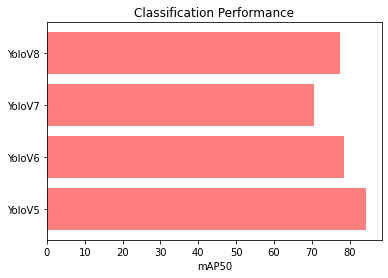

In [8]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('mAP50')
plt2.title('Classification Performance')
plt2.show()

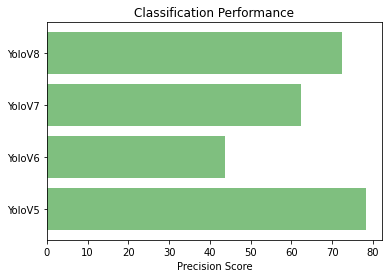

In [9]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score1, align='center', alpha=0.5,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

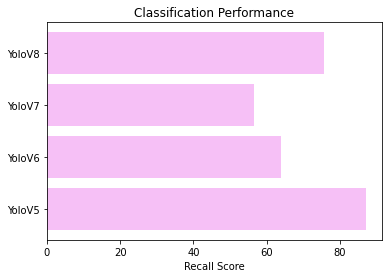

In [10]:
plt2.barh(y_pos, score2, align='center', alpha=0.5,color='violet')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()